## Table of Contents
- [What is Linear Regression?](#lr-what-is)
- [Hypothesis](#lr-hypothesis)
- [Cost function](#lr-cost-function)
- [Train Dataset](#lr-dataset)
- [Training](#lr-training)
- [Gradient Descent Implementation](#lr-gd-impl)
- [Evaluation](#lr-evaluation)
- [SKLEARN Solution](#lr-sklearn)
- [Results](#lr-results)
- [Resources](#lr-resources)

### What is Linear Regression? <a class="anchor" id="lr-what-is"></a>
Linear regression is a model that finds a relationship between one or more features (independent variables) and a continuous target variable (dependent variable).
When there is only one feature it is called <b>Uni-Variate Linear Regression</b> and if there are multiple features, it is called <b>Multiple Linear Regression</b>.

<a href="https://en.wikipedia.org/wiki/Linear_regression">Linear Regression</a> is one of existing models used in <b>Statistics</b> for <b>Regression Analysis</b>

### Linear Regression Hypothesis <a class="anchor" id="lr-hypothesis"></a>
Hypothesis is a function, that is used to train model and eventually predict outcome based on new input.

$$ Y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$
or
$$ h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$

- $Y$ or $h(x)$ - Predicted Value or Hypothesis
- $\theta_0$ - bias
- $\theta_1, ..., \theta_n$ - model parameters
- $x_1, ..., x_n$ - feature values

Hypothesis $Y$ also can be represented as:

$$ Y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \sum_{n=1}^{m}\theta_{i}x_{i} = \theta^{T}x$$

- $m$ - total number of examples in our dataset
- $\theta^{T}$ - is the model’s parameter vector including the bias term $\theta_{0}$
- $x$ - is the feature vector with $x_{0} = 1$

### Cost function <a class="anchor" id="lr-cost-function"></a>

Cost function is used to define and measure the error of our model. We will define it as the sum of squares of errors.

$$ J(\theta) = \dfrac{1}{2m}\sum_{i = 1}^{m}(h(x^i) - y^i)^2$$

<b><a href="https://en.wikipedia.org/wiki/Gradient_descent">Gradient descent</a></b> is a generic optimization algorithm used in many machine learning algorithms. It iteratively tweaks the parameters of the model in order to minimize the cost function.

### Train Dataset <a class="anchor" id="lr-dataset"></a>

For the purpose if this notebook, I will generate bunch of random digits that will be used as 'dataset' 

In [1]:
# In case if we will need later on just run some blocks that depend on NumPy
import numpy as np
import matplotlib.pyplot as plt

# Also I will import dataset split function, because I'm lazy.
from sklearn.model_selection import train_test_split

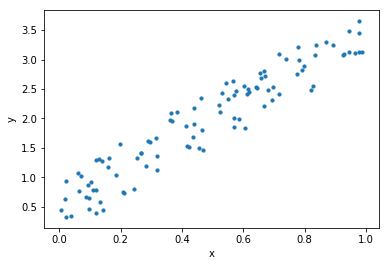

In [2]:
# Generate random dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = 3 * x + np.random.rand(100, 1)

# Build distribution graph for newly generated numbers
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Training the Data Model <a class="anchor" id="lr-training"></a>

Basically we need to find parameters so that model best fit the data. In this case our randomly generated data. 

The line for which the the <i>error</i> between the <b>predicted values</b> and the <b>observed values</b> is <b>minimum</b> is called the best fit line or the <b>regression line</b>. 

By the way, this <i>errors</i> can also be called in some references as <b>residuals</b>

### Gradien Descent Implementation <a class="anchor" id="lr-gd-impl"></a>

Let's try to implement simple gradient descent based fit function.
We were suggested to try to implement this ourselves.

In [3]:
class LinearRegressionWithGradientDescent:
    """Linear Regression Using Gradient Descent.
    Local variables
    ----------
    eta : float
        Defines learning rate
    iterations : int
        Numner of passes over the training set
    
    Attributes
    ----------
    coeff_ : final weights after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta = 0.05, iterations = 1000):
        self.eta = eta
        self.iterations = iterations

    def fit(self, x, y):
        """Fit function
        Input variables
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        
        Returns
        -------
        self : object
        """

        self.cost_ = []
        self.coeff_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.iterations):
            y_pred = np.dot(x, self.coeff_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.coeff_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ Prediction function that can be used after model is trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.coeff_)
    
    def get_coefficients(self):
        print ("Coefficient after model training:", self.coeff_)
        return

In [4]:
# Make training set and test set out of our dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

lin_model = LinearRegressionWithGradientDescent()
lin_model.fit(X_train, Y_train)

predicted_values = lin_model.predict(X_test)
print("Predicted values based on model training:\n", predicted_values, "\n")
print("Actual values based on test set:\n", Y_test, "\n")

lin_model.get_coefficients()

Predicted values based on model training:
 [[3.12522492]
 [1.73639969]
 [0.80085048]
 [1.98648822]
 [2.81410964]
 [2.97119287]
 [3.01381148]
 [3.72524684]
 [3.16948325]
 [2.35111543]
 [0.07654217]
 [2.34844507]
 [3.71702877]
 [1.36851683]
 [0.60513983]
 [0.07152599]
 [2.65563018]
 [0.96418972]
 [2.16234063]
 [0.36581196]] 

Actual values based on test set:
 [[2.47469377]
 [1.50392506]
 [0.73137457]
 [2.2257185 ]
 [3.01148844]
 [2.98557773]
 [2.82230049]
 [3.66110931]
 [3.07913241]
 [2.44377925]
 [0.31467912]
 [2.50400281]
 [3.450415  ]
 [1.9750703 ]
 [1.17433752]
 [0.62633431]
 [2.52875851]
 [1.32897555]
 [2.40361296]
 [0.4599249 ]] 

Coefficient after model training: [[3.80663909]]


### Evaluation <a class="anchor" id="lr-evaluation"></a>

Know we need to know, how good are we with our model. For this we will use <b><a href="https://en.wikipedia.org/wiki/Root-mean-square_deviation">Root mean squared error(RMSE)</a></b> and <b><a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">Coefficient of Determination($R^2$ score)</a></b> to evaluate our model.

$RMSE$ is defined as:

$$ RMSE = \sqrt{\dfrac{1}{m}\sum_{i = 1}^{m}(h(x^i) - y^i)^2}$$

$R^2$ is defined as:

$$ R^2 = 1 - \dfrac{SS_r}{SS_t} $$

- $SS_r$ - is the total sum of errors if we take the mean of the observed values as the predicted value.
- $SS_t$ - is the sum of the square of errors

In [5]:
# Let's define function that will calculate RMSE
def get_rmse(p_values, t_values):
        """ This function calculates RMSE based on model prediction and test set
        Parameters
        ----------
        p_values : array-like,
                   predicted values by model after training
        t_values : array-like
                   actual values from test set
        Returns
        -------
        Print-out of RMSE value
        """
        
        # ** is the same as pow() function. Just returns squared value.
        mse = np.sum((p_values - t_values)**2)

        # len(t_values) -> returns number of entries in array, this is 'm' value from equation
        rmse = np.sqrt(mse/len(t_values))

        print ("RMSE = ", rmse)
        return

# Let's define function that will calculate coefficient of determination    
def get_r2(p_values, t_values):
    """ This function calculates R2 score based on model prediction and test set
    Parameters
    ----------
    p_values : array-like,
               predicted values by model after training
    t_values : array-like
               actual values from test set
    Returns
    -------
    Print-out of R2 score
    """
    ss_r = np.sum((p_values - t_values)**2)
    ss_t = np.sum((t_values - np.mean(t_values))**2)

    r2_score = 1 - (ss_r/ss_t)
    print ("R2 score = ", r2_score)
    return


get_rmse(predicted_values, Y_test)
get_r2(predicted_values, Y_test)

RMSE =  0.31653822319988595
R2 score =  0.8988411204042933


### SKLEARN solution <a class="anchor" id="lr-sklearn"></a>

In [6]:
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Make training set and test set
sX_train, sX_test, sY_train, sY_test = train_test_split(x, y, test_size = 0.2, random_state=5)

sklearn_lin_model = LinearRegression()
history = sklearn_lin_model.fit(sX_train, sY_train)

print("Getting coefficients from 'history':")
print(history.coef_, "\n")

y_test_predict = sklearn_lin_model.predict(sX_test)
rmse = (numpy.sqrt(mean_squared_error(sY_test, y_test_predict)))
r2 = r2_score(sY_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


Getting coefficients from 'history':
[[2.87133665]] 

The model performance for testing set
--------------------------------------
RMSE is 0.2541310419919423
R2 score is 0.9347970681170494


### Results <a class="anchor" id="lr-results"></a>

Here is a comparisment for results I got from my implementation defined above and the one used in SKLEARN library.

| Value | My LR Implementation | SKLEARN LR Implementation   |
|-------|----------------|-------------------|
|coefficients |3.80663909|2.87133665 |
|RMSE score|0.31653822319988595|0.2541310419919423|
|R2 score|0.8988411204042933|0.9347970681170494|

### Resources <a class="anchor" id="lr-resources"></a>

- <a href="http://ocdevel.com/mlg/5">Machine Learning Guide podcast, on Linear Regression</a>
- <a href="https://www.youtube.com/watch?v=kHwlB_j7Hkc">Andrew Ng lecture on Uni-variate Linear Regression</a>
- <a href="https://www.udemy.com/data-science-linear-regression-in-python/">Udemy course on Linear Regression in Python</a>


Created by <a class="reference external" href="https://www.facebook.com/vladyslav.elashevskyy">Vladyslav Ieliashevskyi</a> in May 2019, based on second lecture of Lviv Data Science School 2019, performed by <a class="reference external" href="https://www.facebook.com/oleksandr.gurbych">Oleksandr Gurbych</a>

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/deed.en_US">Creative Commons Attribution 3.0 Unported License</a>